# Which model should we use for the biotransformation?

Here are two standard models that can describe (bio)chemical reactions.

Both of them can be written as differential equations to describe the product formation rate $v$.

Michaelis Menten:
$$\frac{dPdt}{dt} = v = v_{max} \cdot \frac{S}{K_S+S}$$

Mass action:
$$\frac{dPdt}{dt} = v=k \cdot S$$

In [1]:
import murefi
import numpy
from matplotlib import pyplot

import models


def plot_outcomes(outcomes:dict):
    fig, ax = pyplot.subplots()
    
    for label, (t, y) in outcomes.items():
        ax.plot(t, y, label=label)
    
    ax.set(
        ylim=(0, 1),
        xlim=(0, None),
        ylabel="P   [mM]",
        xlabel="time   [min]"
    )
    ax.legend()
    return fig, ax

t = numpy.linspace(0, 5, 50)

You are running the v4 development version of PyMC3 which currently still lacks key features. You probably want to use the stable v3 instead which you can either install via conda or find on the v3 GitHub branch: https://github.com/pymc-devs/pymc3/tree/v3


## Mass action model
The mass action kinetics can be simplified to an exponential function:

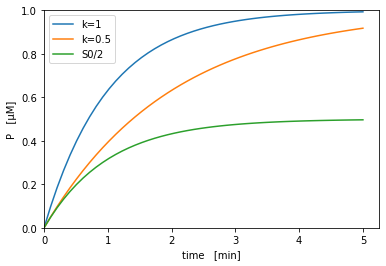

In [2]:
def mass_action(t, S0, k):
    return S0 * (1 - numpy.exp(-t * k))


plot_outcomes({
    "k=1": (t, mass_action(t, 1, k=1)),
    "k=0.5": (t, mass_action(t, 1, k=0.5)),
    "S0/2": (t, mass_action(t, 1/2, k=1)),
});

## Michaelis-Menten model
In this model the reaction rate has a maximum speed $v_{max}$ and slows down depending on $K_S$ and $S$.
The dependence on $S$ makes it a differential equation and we can't write it as an explicit function.
Differential equations are much more costly to compute, so we don't want to use this model unless we need to because of the data, or because of which parameters we are interested in.

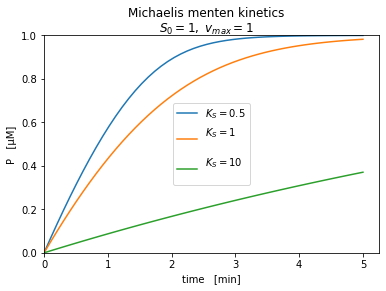

In [3]:
model = models.MichaelisMentenModel()

def michaelis_menten(t, S0, vmax, KS):
    template = murefi.Replicate()
    template["P"] = murefi.Timeseries(
        t,
        [None]*len(t),
        independent_key="P",
        dependent_key="P"
    )
    pred = model.predict_replicate(
        parameters=[S0, 0, vmax, KS],
        template=template
    )
    return pred["P"].y

fig, axs = plot_outcomes({
    "$K_S=0.5$": (t, michaelis_menten(t, 1, 1, 0.5)),
    "$K_S=1$\n": (t, michaelis_menten(t, 1, 1, 1)),
    "$K_S=10$\n": (t, michaelis_menten(t, 1, 1, 10)),
})
fig.suptitle("Michaelis menten kinetics\n$S_0=1,\ v_{max}=1$")
pyplot.show()

## Sometimes they are the same
At very high $K_S$ and $v_{max}$ the two models can give the same result.

The consequence is that we can't always tell which model is more suited to do the job.
Sometimes we can use that to our advantage and roll with the mass action kinetics that are much faster to compute.

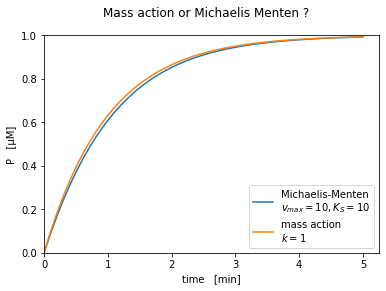

In [4]:
fig, axs = plot_outcomes({
    "Michaelis-Menten\n$v_{max}=10, K_S=10$": (t, michaelis_menten(t, 1, 10, 10)),
    "mass action\n$k=1$": (t, mass_action(t, 1, k=1)),
})
fig.suptitle("Mass action or Michaelis Menten ?")
pyplot.show()

In [5]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Thu Jul 22 2021

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.22.0

matplotlib: 3.4.2
murefi    : 5.0.1
numpy     : 1.20.3

Watermark: 2.2.0

